In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('weight-height.csv')
df.shape

(10000, 3)

In [28]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


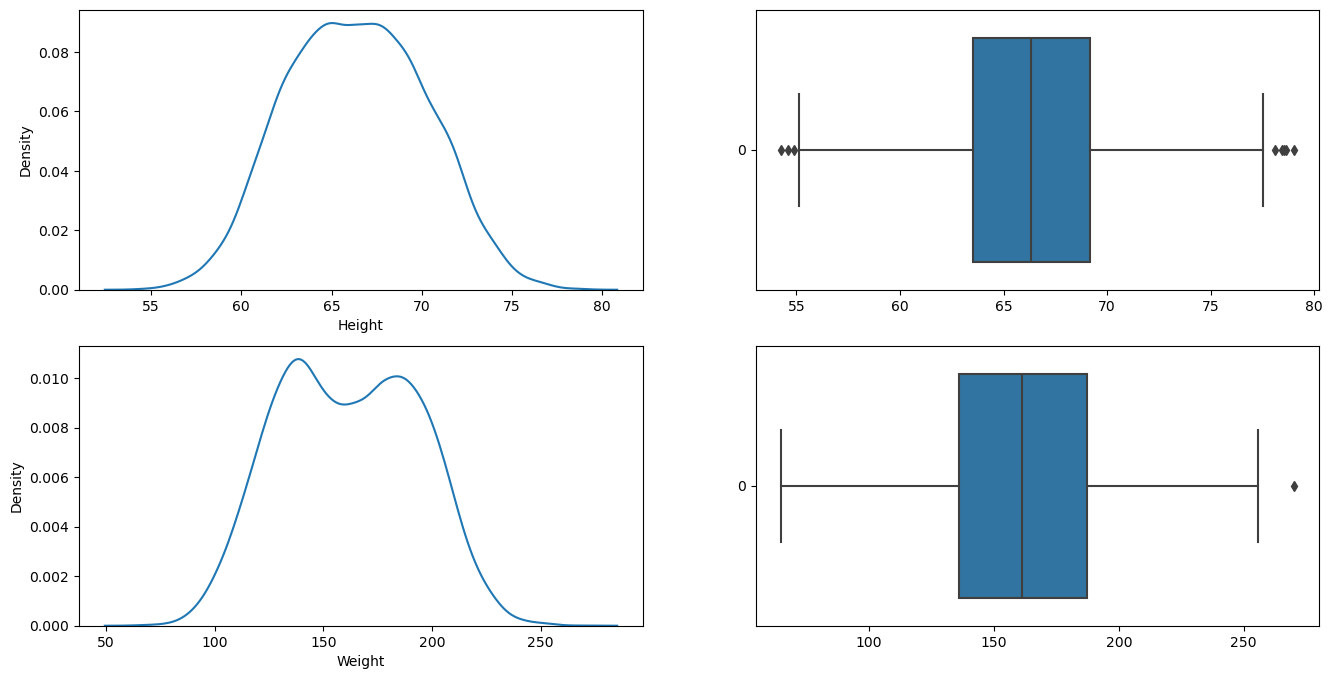

In [29]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])
plt.subplot(2,2,2)
sns.boxplot(df['Height'],orient='h')
plt.subplot(2,2,3)
sns.kdeplot(df['Weight'])
plt.subplot(2,2,4)
sns.boxplot(df['Weight'],orient='h')
plt.show()

## Weight doesnot have much outliers show will apply for height only

### Trimming

In [30]:
upper_limit = df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [31]:
lower_limit = df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [32]:
new_df = df[(df['Height'] <= upper_limit) & (df['Height'] >= lower_limit)]

In [33]:
new_df.shape

(9800, 3)

In [34]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [35]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


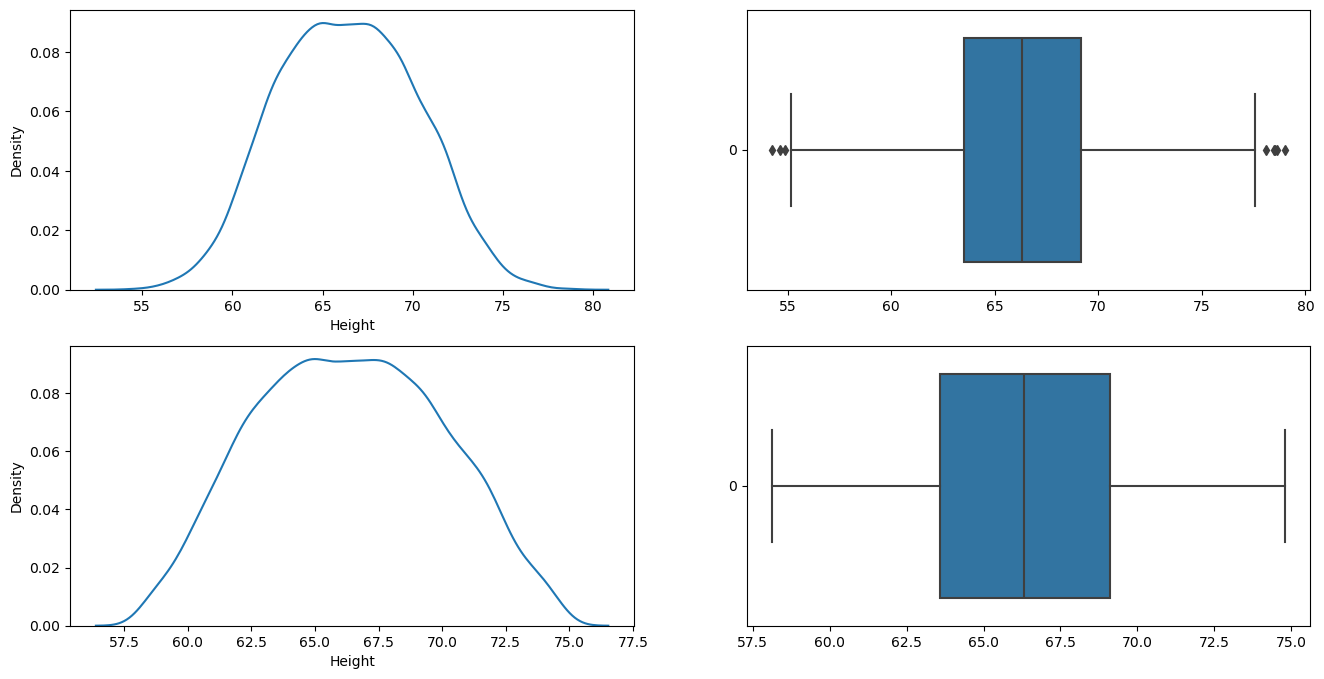

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])
plt.subplot(2,2,2)
sns.boxplot(df['Height'],orient='h')
plt.subplot(2,2,3)
sns.kdeplot(new_df['Height'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Height'],orient='h')
plt.show()

### Winsorization

In [37]:
new2_df=df.copy()
new2_df['Height'] = np.where(new2_df['Height'] >= upper_limit,
        upper_limit,
        np.where(new2_df['Height'] <= lower_limit,
        lower_limit,
        new2_df['Height']))

C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PARTH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


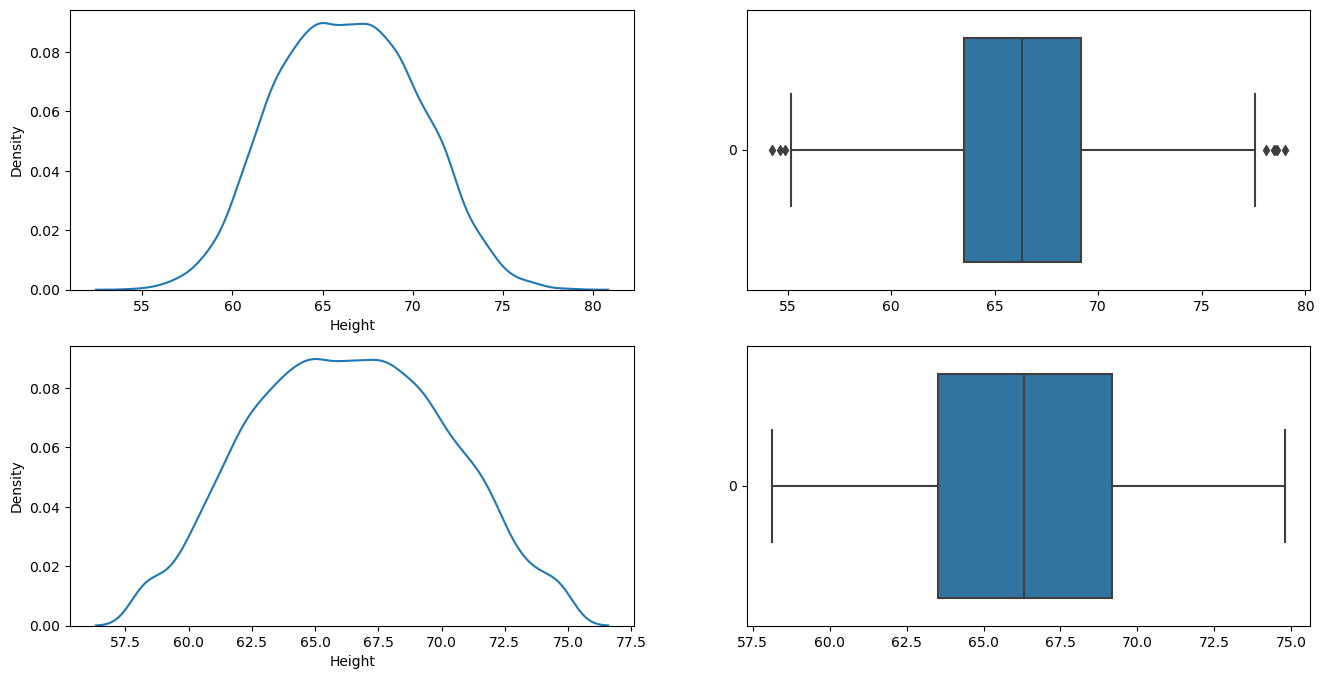

In [38]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])
plt.subplot(2,2,2)
sns.boxplot(df['Height'],orient='h')
plt.subplot(2,2,3)
sns.kdeplot(new2_df['Height'])
plt.subplot(2,2,4)
sns.boxplot(new2_df['Height'],orient='h')
plt.show()